In [ ]:
# NOTES
# RUN CELLS THROUGH TO THE CELL LABELED "DRIVER CODE" IN ORDER

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
from mat4py import loadmat 
# from keras.utils import to_categorical
import time
import glob
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

In [3]:
!ls

Channel-0.png       Channel-3.png       Channel-6.png       mbsi-p300-dataset
Channel-1.png       Channel-4.png       Channel-7.png
Channel-2.png       Channel-5.png       P300 Analysis.ipynb


In [215]:
folder = './mbsi-p300-dataset/*.mat'
files = glob.glob(folder)
files.pop(3) #drop the data badly structured
# test_file = files.pop(0) #last subject for testing the network

'./mbsi-p300-dataset/P300S04.mat'

In [216]:
print(files)

['./mbsi-p300-dataset/P300S02.mat', './mbsi-p300-dataset/P300S03.mat', './mbsi-p300-dataset/P300S01.mat', './mbsi-p300-dataset/P300S05.mat', './mbsi-p300-dataset/P300S07.mat', './mbsi-p300-dataset/P300S06.mat', './mbsi-p300-dataset/P300S08.mat']


In [6]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 24.0       # sample rate, Hz
cutoff = 1.5  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

print(a)

[ 1.         -4.48456301  8.52900508 -8.77910797  5.14764268 -1.62771478
  0.21658286]


In [7]:
def normalized(vec):
    norm_vec = (vec - vec.min(axis=1, keepdims=True))/vec.ptp(axis=1, keepdims=True)
    return norm_vec

In [8]:
def clean_data(X, Y, flash):
  
    X_samples = np.array([np.array(X[i[0]:i[0]+351]) for i in flash] )
    column    = [i[2] for i in flash]
    label     = [i[3] - 1 for i in flash]

    LIMIT = 4080 #the last trial is incomplete
    X_selected = np.array(X_samples[:LIMIT])
    col_selected = np.array(column[:LIMIT])
    label_selected = np.array(label[:LIMIT])

    y = np.array(to_categorical(label_selected))

    false_idx = [k for k, i in enumerate(y) if i[0] == 1]
    true_idx  = [k for k, i in enumerate(y) if i[0] == 0]

    falseX = X_selected[false_idx]
    falsey = y[false_idx]

    trueX  = X_selected[true_idx]  
    truey  = y[true_idx]
    # proportional data to avoid greedy cost funtion

    proportionalX = falseX[:int(len(trueX))]
    proportionaly = falsey[:int(len(truey))]

    finalX = np.concatenate((trueX, proportionalX))
    finaly = np.concatenate((truey, proportionaly))

    X_timeseries = np.vstack(finalX)
    X_letters = X_timeseries.reshape(34,40,351,8)
    y_letters = finaly.reshape(34,40,2)
    cleaned_X = np.vstack(X_letters)
    cleaned_Y = np.vstack(y_letters)

    return cleaned_X, cleaned_Y

In [223]:
def visualise_data():
    temp = []
#     file = files[0];
    for file in files:
        raw_data = loadmat(file)
        useful_data = raw_data['data'].copy()
        print(file)
        X = np.array(useful_data['X'])
        Y = useful_data['y']

        T = useful_data['trial']
        F = useful_data['flash']

        X_filtered = butter_lowpass_filter(X, cutoff, fs, order)
        [250]
        i=0
        xlen = len(X)
        for idx in F:
            if idx[3] == 2:
                i += 1
                if not len(temp):
                    for electrode in range(8):
                        temp.append(np.array(X[idx[0]-50:idx[0]+250, electrode]))
                else:
                    for electrode in range(8):
                        if not (idx[0]-50 < 0 or idx[0]+250 > xlen):
                            temp[electrode] = np.vstack((temp[electrode], np.array(X[idx[0]-50:idx[0]+250, electrode])))

    
    means_arr = [np.mean(i, axis = 0) for i in temp]
    print(means_arr[0].shape)
    
#     means_arr = np.array(means_arr)
#     n = means_arr.T
    graph_axis = [i/250 for i in range(-50, 250) ]
    
#     figure, axis = plt.subplots(2, 4)
#     for i in range(4):
#         axis[0,i].plot(graph_axis,n[i])
#         y_lab = f'Channel: {i}'
#         axis[0,i].ylabel(y_lab)
#         axis[0,i].xlabel(time)
#         axis[0,i].set_title(f"Channel: {i}")
    
#     for i in range(4, n.shape[0]):
#         axis[0,i].plot(graph_axis,n[i])
#         y_lab = f'Channel: {i}'
#         axis[0,i].ylabel(y_lab)
#         axis[0,i].xlabel(time)
#         axis[0,i].set_title(f"Channel: {i}")
        
    
    for i in range(len(means_arr)):
        plt.figure(facecolor=(1, 1, 1))
        plt.plot(graph_axis,means_arr[i])
        y_lab = f'Channel: {i}'
        plt.title(f'Channel: {i}')
        plt.ylabel(y_lab)
        plt.xlabel(time)
        plt.savefig(f'Channel-{i}.png')
        plt.show()

    return X_filtered, Y, T, F

./mbsi-p300-dataset/P300S02.mat
./mbsi-p300-dataset/P300S03.mat
./mbsi-p300-dataset/P300S01.mat
./mbsi-p300-dataset/P300S05.mat
./mbsi-p300-dataset/P300S07.mat
./mbsi-p300-dataset/P300S06.mat
./mbsi-p300-dataset/P300S08.mat
(300,)


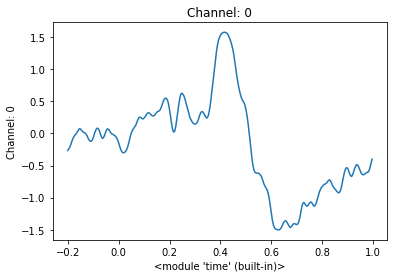

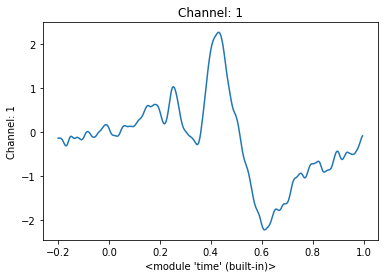

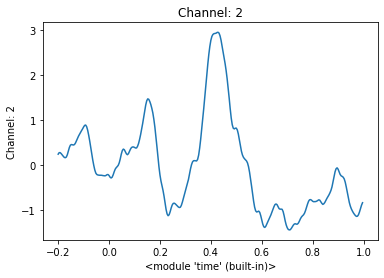

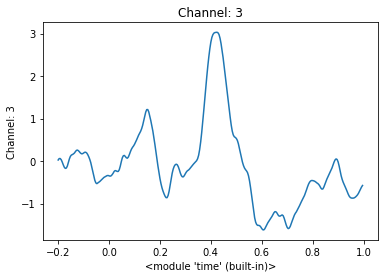

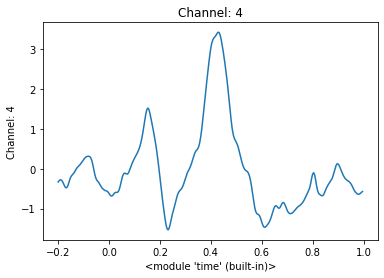

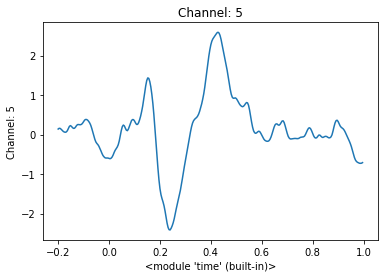

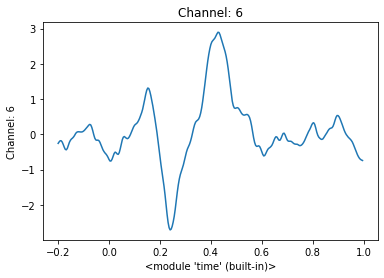

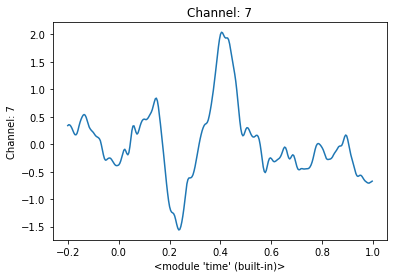

In [224]:
# driver code 
X, Y, Trials, Flash = visualise_data()

In [ ]:
# BELOW IS ARCHIVE

In [ ]:
file = files[0]
raw_data = loadmat(file)
useful_data = raw_data['data'].copy()
X = useful_data['X']
Y = useful_data['y']

T = useful_data['trial']
F = useful_data['flash']
# X_mean = np.mean(X, axis=1)
X_filtered = butter_lowpass_filter(X, cutoff, fs, order)
[250]

print(F)
electrode = 0
# for idx in T:
#     if (len(temp)==len(T)):
#         np.concatenate((temp[electrode],np.array(X[idx-50:idx+250])), axis=0)
#         electrode += 1
#     else: 
#         temp.append(np.array(X[idx-50:idx+250]))


In [2]:
def train_net(model):
    appX = []
    appy = []
    init = time.time()
    file = files[0]
    print(file)
#   for file in files:
    X, Y, Trials, Flash = prepare_data(file)
    print(X)
#     X_clean, y_clean = clean_data(X, Y, Flash)
    print(X)
    print(Y)
    
    appX.append(X_clean)
    appy.append(y_clean)

#   X = [subject for subject in appX]
#   y = [subject for subject in appy]


In [9]:
def prepare_data(file):
    allX = []
    allY = []
    allT = []
    allF = []
    raw_data = loadmat(file)
    useful_data = raw_data['data'].copy()
    X = useful_data['X']
    Y = useful_data['y']
    
    T = useful_data['trial']
    F = useful_data['flash']
    # X_mean = np.mean(X, axis=1)
    X_filtered = butter_lowpass_filter(X, cutoff, fs, order)
    [250]
    temp = []
    for idx in T:
#         print(X[idx-100:idx+250])
        temp.append(np.array(X[idx-20:idx+250]))
#         for i in range(idx-250*.4, indx+250):
#             temp.append(X[i])
    
    arr = np.array(temp)
    print(arr.shape)
    
    n = np.mean(arr, axis = 0)
    
    n=n.T
    axis = [i/100 for i in range(-20, 250,1) ]
    for i in range(n.shape[0]):
        
        plt.plot(axis,n[i])
        y_lab = f'Channel: {i}'
        plt.title('Graph')
        plt.ylabel(y_lab)
        plt.xlabel(time)
        plt.show()
    
    # Plot test accuracy values
#     plt.rcParams["figure.figsize"] = (10,7)
#     plt.plot(acc)
#     plt.plot(val_acc)
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Valid'], loc='upper left')
#     plt.show()
  
    return X_filtered, Y, T, F

(35, 270, 8)


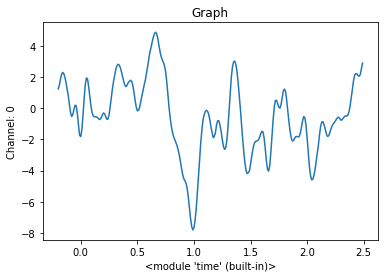

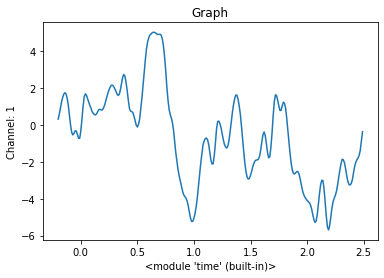

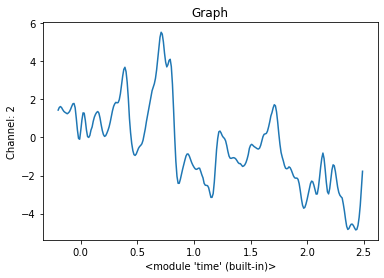

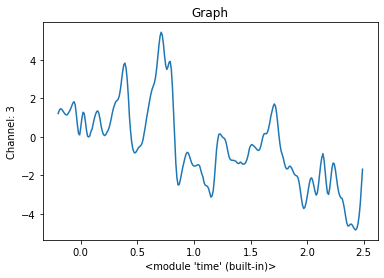

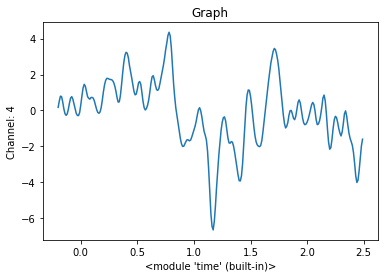

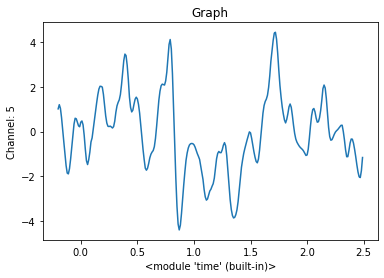

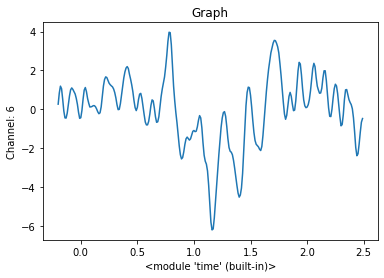

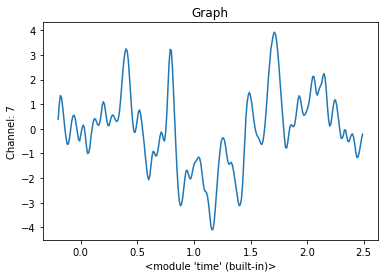

In [10]:
appX = []
appy = []
init = time.time()
file = files[0]
#   for file in files:
X, Y, Trials, Flash = prepare_data(file)
# X_clean, y_clean = clean_data(X, Y, Flash)


# appX.append(X_clean)
# appy.append(y_clean)